# Network-Analysis-for-Information-Retrieval

## Data 

In [1]:
import pandas as pd
from random import seed

seed(3052000)

FILE_PREFIX = "dblp-ref-"
NB_FILES = 4

corpus = []

# Load all the files into a single dataframe
# for i in range(0, NB_FILES):
#     file = './data/' + FILE_PREFIX + str(i) + ".json"
#     data = pd.read_json(file, lines=True)
#     corpus.append(data)

# Load the lightest file
file = './data/' + FILE_PREFIX + '3' + ".json"
data = pd.read_json(file, lines=True)
corpus.append(data)

corpus = pd.concat(corpus, ignore_index=True)

C:\Users\Mathis\AppData\Local\Temp\ipykernel_8684\476414204.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import numpy as np

# replace NaN references with empty list
for index, row in corpus.iterrows():
    if type(row['references']) != list:
        corpus.at[index, 'references'] = []

# print nan references
print("Number of NAN references", corpus['references'].isna().sum())

# replace references ids by existing ids of the corpus
for index, row in corpus.iterrows():
    for ref_index, ref in enumerate(row['references']):
        random_index = index
        while random_index == index:
            random_index = np.random.randint(0, corpus.shape[0])
        row['references'][ref_index] = corpus['id'].iloc[random_index]

Number of NAN references 0


In [3]:
corpus.shape

(79007, 8)

----- Abstracts -----
Mean length of Abstracts 1060.5378252168111
Max length of Abstracts 7139.0
Min length of Abstracts 60.0


----- Authors -----


Number of authors 282514
Number of unique authors 178268
Mean number of authors per paper 1.5847712432966097
Number of paper per author : authors
Wei Wang                92
Yang Yang               54
Mohamed-Slim Alouini    53
Jun Wang                52
Wei Zhang               52
                        ..
Patrice Koehl            1
Saghi Nojoomi            1
Wataru Noguchi           1
Atulan Zaman             1
Eirik Abildsnes          1
Name: count, Length: 178268, dtype: int64


----- Temporal distribution -----


<Axes: >

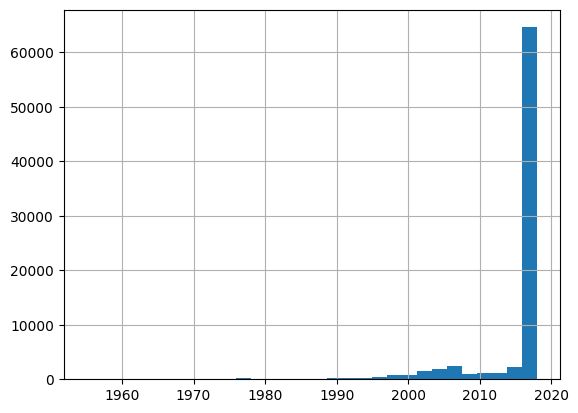

In [4]:
print("----- Abstracts -----")
print("Mean length of Abstracts", corpus['abstract'].str.len().mean())
print("Max length of Abstracts", corpus['abstract'].str.len().max())
print("Min length of Abstracts", corpus['abstract'].str.len().min())

print("\n")
print("----- Authors -----")
df_exploded = corpus.explode('authors')
print("Number of authors", len(df_exploded['authors']))
unique_authors = df_exploded['authors'].unique().tolist()
print("Number of unique authors", len(unique_authors))
print("Mean number of authors per paper", df_exploded['authors'].value_counts().mean())
print("Number of paper per author :", df_exploded['authors'].value_counts())

## temporal distribution
print("\n")
print("----- Temporal distribution -----")
corpus['year'].hist(bins=30)

## Networks

In [5]:
import mpld3
import itertools
import networkx as nx
import matplotlib.pyplot as plt

NB_NODES = 2000 # number of nodes to display because of the huge number of nodes

### Authorship Network

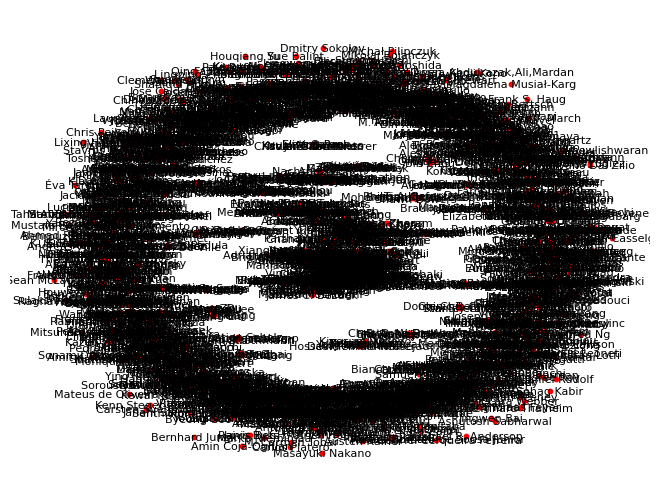

In [6]:
mpld3.enable_notebook()

G = nx.Graph()

for authors_list in corpus['authors']:
    G.add_nodes_from(authors_list)
    G.add_edges_from(itertools.combinations(authors_list, 2))

nodes_to_keep = list(G.nodes())[:NB_NODES]
G_filtered = G.subgraph(nodes_to_keep)

pos = nx.spring_layout(G_filtered)
nx.draw(G_filtered, pos, with_labels=True, node_size=10, node_color='red', font_size=8)

import matplotlib.pyplot as plt
plt.show()

mpld3.disable_notebook()

#### Statistical Analysis

In [7]:
print("Number of connected components : ", nx.number_connected_components(G_filtered))
print("Density : ", round(nx.density(G_filtered), 2))
print("Average clustering : ", round(nx.average_clustering(G_filtered), 2))
print("Transitivity : ", round(nx.transitivity(G_filtered), 2))
print("Number of nodes : ", G_filtered.number_of_nodes())
print("Number of edges : ", G_filtered.number_of_edges())

Number of connected components :  497
Density :  0.0
Average clustering :  0.82
Transitivity :  0.93
Number of nodes :  2000
Number of edges :  3319


#### Degree Distribution

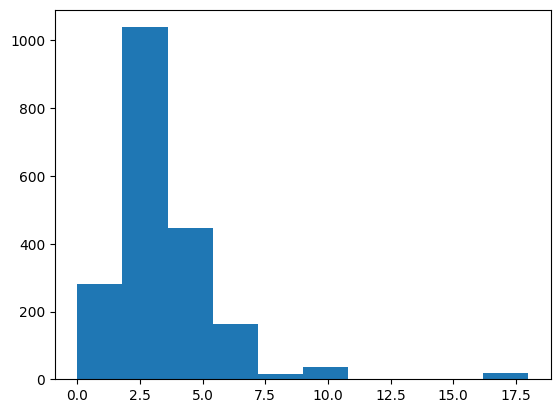

In [8]:
G_filtered.degree()
d_degree = dict(G_filtered.degree())
n, bins, patches = plt.hist(d_degree.values())
plt.show()


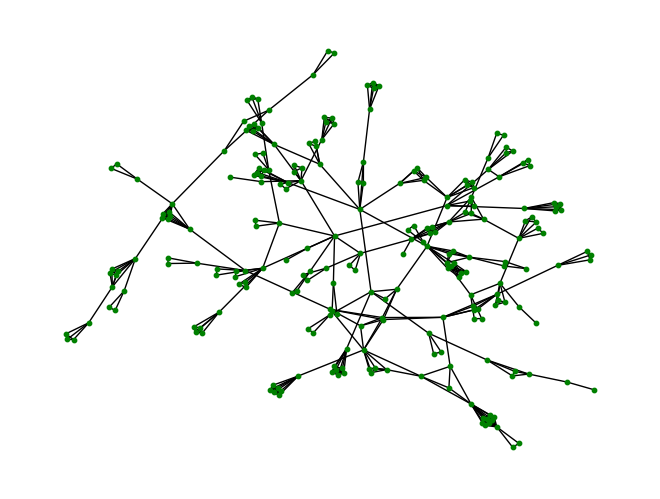

In [9]:
g_sorted = sorted(nx.connected_components(G_filtered), key=len, reverse=True)

g = G_filtered.subgraph(g_sorted[0])
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color='green', font_size=8)
plt.show()

#### Centrality Measures

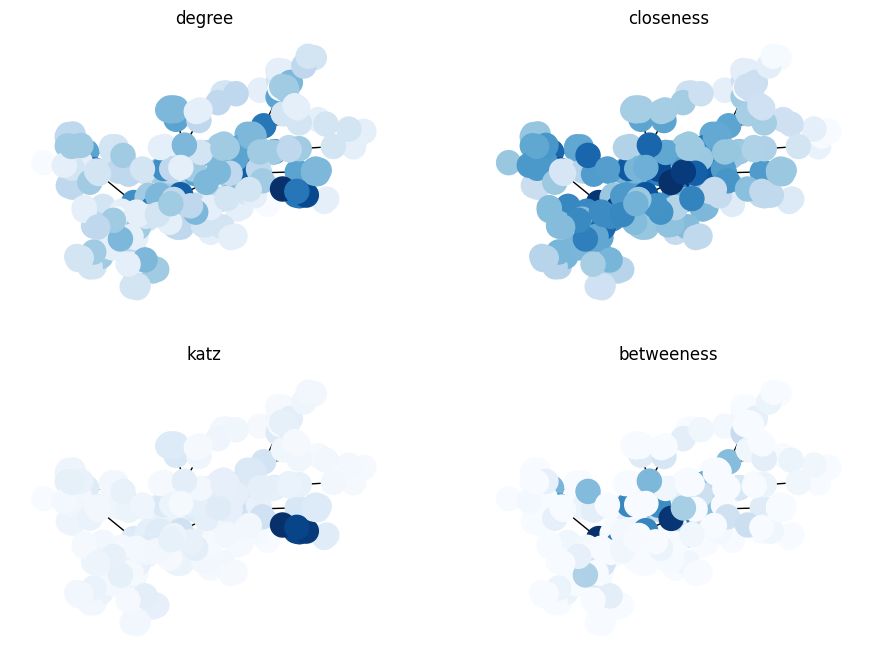

In [10]:
centralities = [nx.degree_centrality, nx.closeness_centrality, nx.katz_centrality, nx.betweenness_centrality]
centralities_names = ["degree", "closeness", "katz","betweeness"]
val_cent = []

for c in centralities:
    val_cent.append(c(g))

my_pos = nx.spring_layout(g)

figure = plt.figure(figsize=(11, 8))
for i in range(len(centralities)):
    figure.add_subplot(2, 2, i+1)
    plt.title(centralities_names[i])
    nx.draw(g, pos = my_pos, with_labels=False, node_color=[*val_cent[i].values()], cmap=plt.cm.Blues)
plt.show()

### Document Network

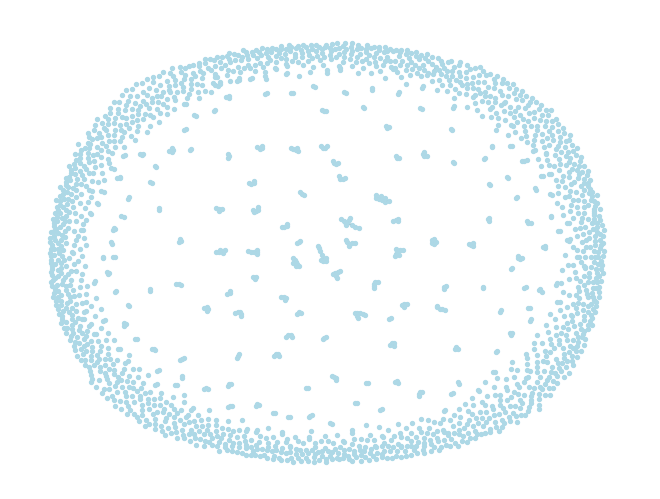

In [11]:
G = nx.Graph()

for index, row in corpus.iterrows():
    G.add_node(row['id'])

for index, row in corpus.iterrows():
    for ref in row['references']:
        if ref in G.nodes():
            G.add_edge(row['id'], ref)
    

nodes_to_keep = list(G.nodes())[:NB_NODES]
G_filtered = G.subgraph(nodes_to_keep)

pos = nx.spring_layout(G_filtered)
nx.draw(G_filtered, pos, with_labels=False, node_size=8, node_color='lightblue', font_size=8)

plt.show()

#### Statistical Analysis

In [12]:
print("Number of connected components : ", nx.number_connected_components(G_filtered))
print("Density : ", round(nx.density(G_filtered), 2))
print("Average clustering : ", round(nx.average_clustering(G_filtered), 2))
print("Transitivity : ", round(nx.transitivity(G_filtered), 2))
print("Number of nodes : ", G_filtered.number_of_nodes())
print("Number of edges : ", G_filtered.number_of_edges())

Number of connected components :  1637
Density :  0.0
Average clustering :  0.0
Transitivity :  0
Number of nodes :  2000
Number of edges :  363


#### Degree Distribution

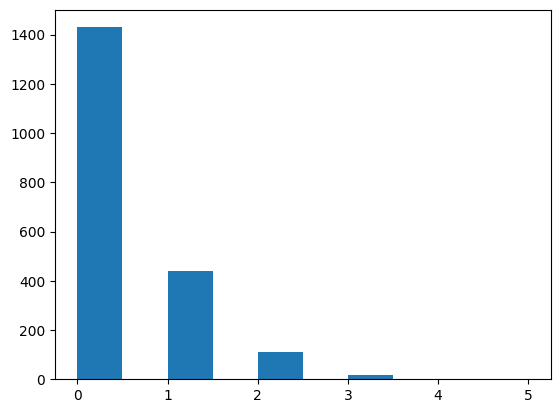

In [13]:
G_filtered.degree()
d_degree = dict(G_filtered.degree())
n, bins, patches = plt.hist(d_degree.values())
plt.show()

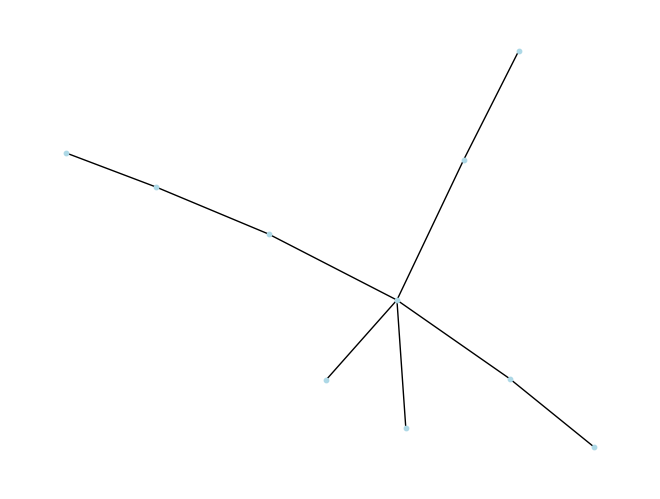

In [14]:
# extract the largest connected component
g_sorted = sorted(nx.connected_components(G_filtered), key=len, reverse=True)

g = G_filtered.subgraph(g_sorted[0])
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color='lightblue', font_size=8)
plt.show()

#### Centrality Measures

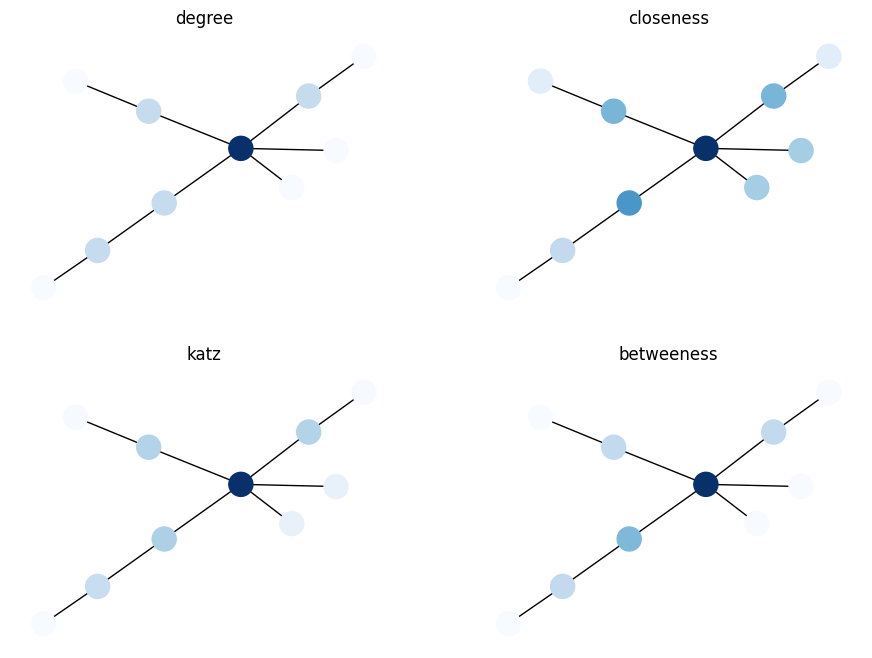

In [15]:
centralities = [nx.degree_centrality, nx.closeness_centrality, nx.katz_centrality, nx.betweenness_centrality]
centralities_names = ["degree", "closeness", "katz","betweeness"]
val_cent = []

for c in centralities:
    val_cent.append(c(g))

my_pos = nx.spring_layout(g)

figure = plt.figure(figsize=(11, 8))
for i in range(len(centralities)):
    figure.add_subplot(2, 2, i+1)
    plt.title(centralities_names[i])
    nx.draw(g, pos = my_pos, with_labels=False, node_color=[*val_cent[i].values()], cmap=plt.cm.Blues)
plt.show()

## Search Engine

### Preprocessing

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mathis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mathis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mathis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
## count NAN abstract
print("Number of NAN abstracts", corpus['abstract'].isna().sum())

## remove NAN abstracts
corpus = corpus.dropna(subset=['abstract'])

Number of NAN abstracts 34037


In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

corpus['abstract'] = corpus['abstract'].apply(preprocess)

### Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus['abstract'])
features_hp = vectorizer.get_feature_names_out()

In [20]:
from scipy.sparse import find, csr_matrix
import pandas as pd

# des options permettent de limiter (ou non) le nombre de lignes/colonnes affichées
# par exemple :
# pd.set_option('display.max_rows', None)

# cette fonction permet d'afficher une "jolie" représentation du vecteur v
# ARGS :
#   v : le vecteur à afficher (par ex. une ligne de la matrice X)
#   features : le vocabulaire
#   top_n : le nombre de mots maximum à afficher
def print_feats(v, features, top_n = 30):
    _, ids, values = find(v)
    feats = [(ids[i], values[i], features[ids[i]]) for i in range(len(list(ids)))]
    top_feats = sorted(feats, key=lambda x: x[1], reverse=True)[0:top_n]
    return pd.DataFrame({"word" : [t[2] for t in top_feats], "value": [t[1] for t in top_feats]})  

In [21]:
n_docs, n_terms = X.shape

# on fait la somme sur toutes les lignes pour chacun des mots
tf_sum = X.sum(axis=0)
tf_sum = tf_sum.tolist()[0] # conversion en liste

print_feats(tf_sum, features_hp)

word  value
0         use  46895
1      propos  37034
2       model  32944
3      system  32247
4        data  30924
5      method  29521
6       paper  28360
7      result  27070
8   algorithm  24702
9     network  24259
10    perform  22910
11       base  21848
12    problem  20036
13   approach  18689
14       show  18309
15    present  16742
16      studi  15917
17       time  15703
18     differ  15503
19     comput  15299
20     inform  15274
21     provid  14925
22     design  14307
23    process  13938
24       user  13899
25     applic  13875
26    develop  13414
27       also  13094
28       imag  13045
29      optim  12587

In [22]:
from scipy.linalg import norm

# fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
        # numérateur : <i.j>
    num = i.dot(j.transpose())[0,0]
        # dénominateur : ||i||_2 * ||j||_2
    den = norm(i.todense()) * norm(j.todense())
    if (den>0): # on vérifie que le dénominateur n'est pas nul
        return (num/den)
    else:
        return 0

In [23]:
print(print_feats(X[5], features_hp, top_n=40))
print('----------------------------------------')
print(print_feats(X[10], features_hp, top_n=40))

          word  value
0         text      6
1      contain      5
2     recognit      5
3       result      3
4         code      2
5       detect      2
6    dimension      2
7      identif      2
8       propos      2
9         rate      2
10      achiev      1
11       addit      1
12     automat      1
13  background      1
14        base      1
15        bodi      1
16    challeng      1
17       color      1
18      compon      1
19     connect      1
20     coverag      1
21    demonstr      1
22       error      1
23        even      1
24  experiment      1
25        form      1
26     generat      1
27      global      1
28        high      1
29        make      1
30      manual      1
31     multipl      1
32     network      1
33        oper      1
34      orient      1
35  outperform      1
36     paramet      1
37     pattern      1
38     perform      1
39     problem      1
----------------------------------------
             word  value
0        approach      3
1      

In [24]:
similarity_5_10 = round(cosinus(X[5], X[10]) * 100,2)
print("Similarity between 5 and 10 : ", similarity_5_10, "%")

Similarity between 5 and 10 :  4.02 %


#### TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus['abstract'])
features_hp = vectorizer.get_feature_names_out()

n_docs, n_terms = X.shape

In [26]:
# similarité entre les documents
def similarity(input, X):
    input = preprocess(input)
    input = vectorizer.transform([input])
    sim = []
    for i in range(n_docs):
        sim.append(cosinus(input, X[i]))
    return sim

In [27]:
def most_similar(input, X, corpus, top_n=10):    
    sim = similarity(input, X)
    sim_sorted = sorted(enumerate(sim), key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        print("Document ", sim_sorted[i][0], " : ", corpus['title'].iloc[sim_sorted[i][0]], " (", round(sim_sorted[i][1],2)*100, "%)")

In [28]:
most_similar("machine learning", X, corpus, top_n=10)

Document  4173  :  On the feasibility of an embedded machine learning processor for intrusion detection  ( 72.0 %)
Document  44550  :  Infrastructure for Usable Machine Learning: The Stanford DAWN Project  ( 64.0 %)
Document  27692  :  Machine learning and systems for the next frontier in formal verification  ( 63.0 %)
Document  28972  :  The 2003 learning classifier systems bibliography  ( 63.0 %)
Document  27044  :  Hyperparameter optimization to improve bug prediction accuracy  ( 62.0 %)
Document  2985  :  Machine Learning Meets Databases  ( 61.0 %)
Document  34438  :  In vitro molecular machine learning algorithm via symmetric internal loops of DNA  ( 61.0 %)
Document  42712  :  The optimal crowd learning machine  ( 59.0 %)
Document  30622  :  Design and implementation of low-level machine learning API and API server  ( 56.99999999999999 %)
Document  12814  :  Ontology knowledge-based framework for machine learning concept  ( 56.99999999999999 %)


#### Doc2Vec

In [29]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

min_docs = 4
tagged_docs = []
nbw_docs = []

for i, abstract in enumerate(corpus['abstract']):
    if len(abstract.split()) > min_docs:
        tagged_docs.append(TaggedDocument(words=word_tokenize(abstract), tags=[i]))
        nbw_docs.append(len(abstract.split()))

In [30]:
len(tagged_docs)
tagged_docs[0:4]

[TaggedDocument(words=['adaboost', 'algorithm', 'base', 'haarlik', 'featur', 'achiev', 'high', 'accuraci', '95', 'object', 'detect', 'meanwhil', 'massiv', 'comput', 'power', 'need', 'implement', 'cascad', 'classifi', 'involv', 'adaboost', 'detect', 'solv', 'problem', 'sever', 'dedic', 'hardwar', 'solut', 'propos', 'realtim', 'applic', 'work', 'novel', 'heterogen', 'architectur', 'adaboost', 'detector', 'present', 'architectur', 'achiev', 'higher', 'perform', 'consum', 'fewer', 'hardwar', 'resourc', 'combin', 'integr', 'arm', 'cortexa9', 'processor', 'dedic', 'acceler', 'architectur', 'configur', 'realiz', 'various', 'object', 'detect', 'simpli', 'load', 'differ', 'paramet', '2d', 'parallel', 'involv', 'acceler', 'unit', 'combin', 'bring', 'flexibl', 'scheme', 'implement', 'xilinx', 'zc702', 'platform', 'experi', 'result', 'show', '40', 'qvga', 'frame', 'per', 'second', 'achiev', 'realtim', 'face', 'detect', 'acceler', 'achiev', '13', 'time', 'improv', 'opencv', 'implement', 'standalon'

In [31]:
dim_d2v = 10

model_doc2vec = Doc2Vec(tagged_docs, vector_size=dim_d2v, window=3, epochs=50)
model_doc2vec.train(tagged_docs, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)


In [32]:
test_doc = word_tokenize("data".lower())
test_doc_vector = model_doc2vec.infer_vector(test_doc)
res = model_doc2vec.dv.most_similar(positive = [test_doc_vector])
print(res)

[(18518, 0.7781049013137817), (44530, 0.7737313508987427), (3060, 0.7650356292724609), (7308, 0.7619714736938477), (15230, 0.7592740654945374), (3143, 0.7333145141601562), (11647, 0.7304258346557617), (32910, 0.7158789038658142), (20224, 0.7153481841087341), (39097, 0.7122334837913513)]


In [33]:
for i in range(10):
    print("Document ", res[i][0], " : ", corpus['title'].iloc[res[i][0]], " (", round(res[i][1],2)*100, "%)")

Document  18518  :  How to Disassemble a Virus Capsid - A Computational Approach.  ( 78.0 %)
Document  44530  :  A multi-scale deep quad tree based feature extraction method for the recognition of isolated handwritten characters of popular indic scripts  ( 77.0 %)
Document  3060  :  Bayesian multi-topic microarray analysis with hyperparameter reestimation  ( 77.0 %)
Document  7308  :  Combining intrusion detection datasets using MapReduce  ( 76.0 %)
Document  15230  :  An algorithm on extraction of saline-alkalized land by image segmentation based on ETM+ image  ( 76.0 %)
Document  3143  :  IEDC: An Integrated Approach for Overlapping and Non-overlapping Community Detection  ( 73.0 %)
Document  11647  :  What indicators do (or do not) tell us about Regional Innovation Systems  ( 73.0 %)
Document  32910  :  Performance Evaluation of Multiple Cloud Data Centers Allocations for HPC  ( 72.0 %)
Document  20224  :  Kharita: Robust Map Inference using Graph Spanners  ( 72.0 %)
Document  39097

#### Bert SentenceTransformer

In [34]:
# pytorch library
import torch # the main pytorch library
import torch.nn.functional as f # the sub-library containing different functions for manipulating with tensors

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [35]:
# BERT
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
model = model.to(device)

bert_abstract = corpus['abstract'].apply(lambda x: x[:512])

# keep a quarter of the abstracts because of a poptato computer
bert_abstract = bert_abstract.sample(frac=0.25)

embeddings = model.encode(bert_abstract.values, convert_to_tensor=True)

c:\Users\Mathis\dev\Network-Analysis-for-Information-Retrieval\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(embeddings, embeddings)

def most_similar_bert(input, embeddings, top_n=10):
    input = model.encode([input], convert_to_tensor=True)
    sim = cosine_similarity(input, embeddings)
    sim_sorted = sorted(enumerate(sim[0]), key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        print("Document ", sim_sorted[i][0], " : ", bert_abstract.iloc[sim_sorted[i][0]][0:100], " (", round(sim_sorted[i][1],2)*100, "%)")

most_similar_bert("data", embeddings, top_n=10)

Document  5698  :  remark number real applic dynam scenario drive novel abil generat gather inform nowaday massiv amoun  ( 52.99999713897705 %)
Document  6555  :  abil synthes sensori data preserv specif statist properti real data tremend implic data privaci big   ( 51.99999809265137 %)
Document  3445  :  open data increas transpar account countri govern lead free inform share stimul new innov paper anal  ( 50.0 %)
Document  7622  :  amount current produc data emphas import techniqu effici data process search big data collect accord  ( 50.0 %)
Document  6265  :  live knowledg inform societi various kind data explos produc import data typespecif visual techniqu   ( 50.0 %)
Document  232  :  rapid develop comput internet techniqu amount data walk life increas sharpli especi accumul numer hi  ( 50.0 %)
Document  9604  :  as1 one major aim open govern data initi releas social busi valu big challeng ass research demo prop  ( 50.0 %)
Document  9412  :  smartphon revolution way infrastructur 

## Clustering

## Classification

In [36]:
import numpy as np

corpus['venue'].replace('', np.nan, inplace=True)
corpus = corpus.dropna(subset=['venue'])

stop_words_venues = [
    "applied",
    "arxiv",
    "conference",
    "information",
    "international",
    "journal",
    "knowledge",
    "research",
    "symposium",
    "acm",
    "advances",
    "lectures",
    "notes",
    "note"
]

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if t not in stop_words_venues]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

corpus['venue'] = corpus['venue'].apply(preprocess)
    
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus['venue'])
features_venues = vectorizer.get_feature_names_out()

n_docs, n_terms = X.shape

# on fait la somme sur toutes les lignes pour chacun des mots
tf_sum = X.sum(axis=0)
tf_sum = tf_sum.tolist()[0] # conversion en liste

print_feats(tf_sum, features_venues)

C:\Users\Mathis\AppData\Local\Temp\ipykernel_8684\3945182215.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corpus['venue'].replace('', np.nan, inplace=True)


word  value
0      comput  11087
1      scienc   5323
2      lectur   3633
3      system   3538
4    communic   2911
5        ieee   2700
6     network   1822
7     pattern   1505
8    recognit   1503
9       engin   1477
10     applic   1459
11  technolog   1349
12   transact   1302
13    process   1257
14     vision   1172
15      robot   1164
16       data   1056
17     theori   1038
18   intellig   1034
19   mathemat   1004
20      learn    994
21   wireless    962
22     global    955
23   cybernet    939
24     sensor    903
25     design    871
26      autom    818
27     signal    749
28        man    743
29   informat    741

C:\Users\Mathis\AppData\Local\Temp\ipykernel_8684\1317433296.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corpus["category"].replace("", "other", inplace=True)


<Axes: xlabel='category'>

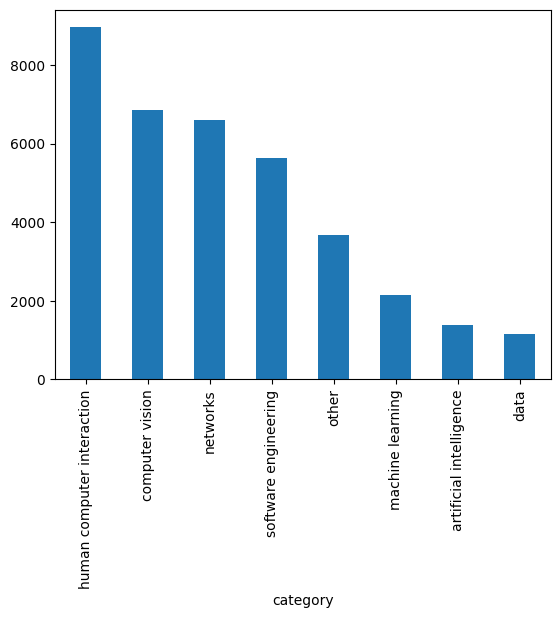

In [37]:
categories = {
    "artificial intelligence" : ["artifici","intellig", "theori", "electron"],
    "computer vision": ["comput", "imag","ieee", "manag", "design", "vision", "recognit", "pattern"],
    "data" : ["data", "analysi", "transact"],
    "human computer interaction": ["communic","robot", "scienc", "human", "sensor"],
    "machine learning": ["model","mathemat", "language", "logic", "algorithm", "learn"],
    "networks": ["network", "system", "process", "secur","wireless","cybernet"],
    "software engineering": ["engin", "technolog", "applic", "softwar", "program", "informat"]
}

# create a new column for each category if abstract contains the category
corpus["category"] = ""

for category, keywords in categories.items():
    for keyword in keywords:
        corpus.loc[corpus['venue'].str.contains(keyword), "category"] = category

# replace empty category with "other"
corpus["category"].replace("", "other", inplace=True)

corpus["category"].value_counts().sum()
corpus["category"].value_counts().plot(kind='bar')


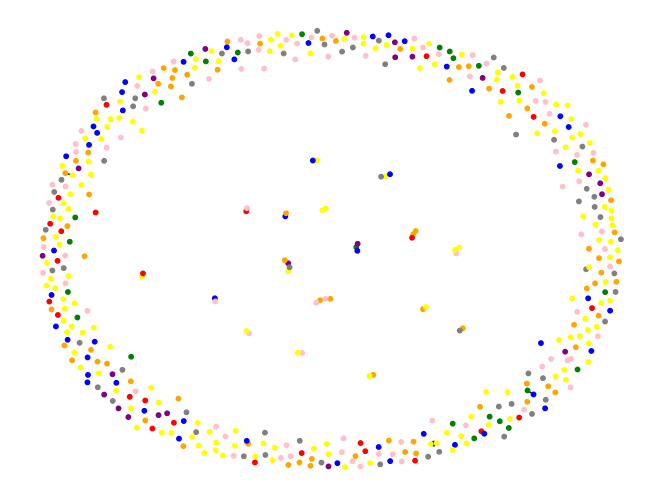

In [38]:
mpld3.enable_notebook()
G = nx.Graph()
NB_NODES = 500

for index, row in corpus.iterrows():
    G.add_node(row['id'], category=row['category'])

for index, row in corpus.iterrows():
    for ref in row['references']:
        if ref in G.nodes():
            G.add_edge(row['id'], ref)

categories_color = {
    "artificial intelligence": "red",
    "computer vision": "blue",
    "data": "green",
    "human computer interaction": "yellow",
    "machine learning": "purple",
    "networks": "orange",
    "software engineering": "pink",
    "other": "grey"
}

sub_G = G.subgraph(list(G.nodes())[:NB_NODES])

# # # create a color map for the nodes
color_map = []

for node in sub_G:
    node_category = sub_G.nodes[node]['category']
    color_map.append(categories_color[node_category])

# # # draw the graph
pos = nx.spring_layout(sub_G)
nx.draw(sub_G, pos, node_color=color_map, with_labels=False, node_size=10)

plt.show()

### Classification of Documents

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(corpus['abstract'], corpus['category'], test_size=0.3, random_state=42)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

X_train = model.encode(X_train.values)
X_test = model.encode(X_test.values)

KeyboardInterrupt: 

In [44]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus['abstract'])

X_train, X_test, y_train, y_test = train_test_split(X, corpus['category'], test_size=0.3, random_state=42)

In [45]:
X_train

<25511x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1255453 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Logistic Regression : ", acc)

Accuracy Logistic Regression :  0.3741540149990854


c:\Users\Mathis\dev\Network-Analysis-for-Information-Retrieval\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy SVM : ", acc)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam', alpha=1e-5, max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy MLP : ", acc)

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv, GATConv, GATv2Conv

import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
# convert networkx graph to pytorch geometric graph
from torch_geometric.utils import convert

# add embeddings to the graph named "x"
for index, row in corpus.iterrows():
    if row['id'] in sub_G.nodes():
        sub_G.nodes[row['id']]['x'] = embeddings[index]
data = convert.from_networkx(sub_G)
data.y = data.category

del data.category
del data.embeddings

# create a mask for the train, validation and test set
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

train_mask[:int(data.num_nodes*0.8)] = 1
val_mask[int(data.num_nodes*0.8):int(data.num_nodes*0.9)] = 1
test_mask[int(data.num_nodes*0.9):] = 1

data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.y = le.fit_transform(np.array(data.y).reshape(-1, 1))

# convert data.y to tensor
data.y = torch.tensor(data.y, dtype=torch.long)

c:\Users\mdousse1\Desktop\Network-Analysis-for-Information-Retrieval\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def print_accuracy(nom_algo, truth_train, pred_train, truth_test, pred_test):
    print(nom_algo + " : ")
    acc_app = np.sum(pred_train == truth_train) / float(len(pred_train))
    print(f"  - réussite (accuracy) apparente : {acc_app:.1%}")
    acc_gen = np.sum(pred_test == truth_test) / float(len(pred_test))
    print(f"  - réussite (accuracy) en généralisation : {acc_gen:.1%}")    

In [ ]:
class MyGCN(torch.nn.Module):
    def __init__(self, d, n_feat):
        super().__init__()
        self.d = d
        # Initialisation des couches de convolutions
        self.conv1 = GCNConv(n_feat, 16)        
        self.conv2 = GCNConv(16, corpus['category'].nunique())

    def forward(self):
        # Récupération des données
        x, edge_index, edge_attr = self.d, data.edge_index, data.edge_attr
        # Premiere convolution
        x = F.dropout(x, training=self.training)
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        # Deuxième convolution
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_attr)
        # Softmax
        return F.log_softmax(x, dim=1)

In [ ]:
class Training():
    
    def __init__(self, m, o):
        self.model = m
        self.optim = o
    
    def train(self, nb_epochs=50):
        progress_bar = tqdm(range(nb_epochs))
        for epoch in progress_bar:
            train_acc, test_acc = self.test()
            progress_bar.set_description(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, Test: {test_acc:.4f}')        
            self.model.train() ## mode "train"
            self.optim.zero_grad()
            F.nll_loss(self.model()[data.train_mask], data.y[data.train_mask]).backward()
            self.optim.step()
        
    def eval(self):
        self.model.eval()
        
    def forward(self):
        return self.model.forward()

    # retourne l'accuracy sur les données d'entraînement (train) et sur le test
    @torch.no_grad()
    def test(self):
        self.model.eval()  ## mode "eval" (pas de dropout)
        log_probs, accs = self.model(), []
        for _, mask in data('train_mask', 'test_mask'):
            pred = log_probs[mask].max(1)[1]
            acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
            accs.append(acc)
        return accs
    
    @torch.no_grad()
    def print_eval(self, name):
        self.model.eval()  ## mode "eval" (pas de dropout)        
        log_probs = self.model()
        pred_train = np.array(log_probs[data.train_mask].max(1)[1])
        pred_test = np.array(log_probs[data.test_mask].max(1)[1])
        print_accuracy(name, data.y[data.train_mask].tolist(), pred_train, data.y[data.test_mask].tolist(), pred_test)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_GCN1, data = MyGCN(data.x, data.num_features).to(device), data.to(device) # Chargement du modèle et des données en mémoire (VRAM ou RAM en fonction de la présence ou non d'un gpu)
optimizer_GCN1 = torch.optim.Adam(model_GCN1.parameters(), lr=0.01, weight_decay=5e-3)    

In [ ]:
m1 = Training(model_GCN1, optimizer_GCN1)
m1.train(nb_epochs=200)

Epoch: 199, Train: 0.5375, Test: 0.2200: 100%|██████████| 200/200 [00:01<00:00, 164.34it/s]


In [ ]:
m1.print_eval("GCN with features")